In [42]:
#! pip install pyreadstat

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns

In [44]:
# data 불러오기
raw_welfare = pd.read_spss('D:/data/Koweps_hpda18_2023_beta1.sav')

#복사본 만들기
welfare = raw_welfare.copy()

In [45]:
#데이터 검토
#welfare   #앞부분,뒷부분 확인
#welfare.shape   #행,열의 개수
#welfare.info()    #열의 속성
welfare.describe()  #요약 통계

,h18_id,h18_ind,h18_sn,h18_merkey,h_new,h_new1,h18_cobf,p18_wsc,p18_wsl,p18_wgc,...,da18_324,da18_325,da18_326,da18_327,da18_6aq14,h18_pers_income1,h18_pers_income2,h18_pers_income3,h18_pers_income4,h18_pers_income5
count,15931.000000,15931.000000,15931.000000,1.593100e+04,15931.000000,15931.000000,130.000000,9775.000000,9775.000000,9775.000000,...,290.000000,955.000000,955.000000,791.000000,895.000000,2897.000000,4104.000000,1114.000000,15931.000000,914.000000
mean,6138.267591,6.927500,1.005147,6.138337e+07,0.154165,0.232252,2.453846,1.000000,1.000000,5281.648798,...,2.520690,7.431414,3.643979,1.271808,1.144134,4795.637211,1595.026316,3613.086176,3.498839,1293.448578
std,3640.121959,6.716206,0.138954,3.640171e+07,0.361118,0.422282,1.800566,0.671061,0.722643,3544.310475,...,1.352143,9.271598,0.768178,0.445173,0.351422,3049.613417,1667.525331,3922.906442,49.643006,1996.625847
min,2.000000,1.000000,1.000000,2.010100e+04,0.000000,0.000000,1.000000,0.009111,0.000000,48.118689,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-3640.000000,0.000000,-4702.000000
25%,2998.000000,1.000000,1.000000,2.998080e+07,0.000000,0.000000,1.000000,0.479451,0.446551,2532.294145,...,2.000000,2.000000,4.000000,1.000000,1.000000,2956.000000,300.000000,1200.000000,0.000000,247.500000
50%,5729.000000,4.000000,1.000000,5.729010e+07,0.000000,0.000000,2.000000,0.935209,0.865471,4939.443317,...,2.000000,5.000000,4.000000,1.000000,1.000000,4020.000000,1092.000000,2627.000000,0.000000,581.000000
75%,9592.000000,17.000000,1.000000,9.592070e+07,0.000000,0.000000,2.000000,1.383096,1.379557,7305.027838,...,2.000000,10.000000,4.000000,2.000000,1.000000,6035.000000,2400.000000,4990.000000,0.000000,1483.000000
max,12011.000000,18.000000,9.000000,1.201117e+08,1.000000,1.000000,7.000000,3.936318,3.116706,20790.249178,...,6.000000,168.000000,4.000000,2.000000,2.000000,61110.000000,31224.000000,45800.000000,3000.000000,19118.000000


In [46]:
#분석에 필요한 열을 결정// 열이름 변경
welfare = welfare.rename(
    columns={'h18_g3'   :  'sex',    #성별
             'h18_g4'   :   'birth',  #태어난 연도
             'h18_g10'   :  'marriage_type',  #혼인상태
             'h18_g11'   : 'religion',             # 종교
             'p1802_8aq1': 'income',         # 월급
             'h18_eco9'  : 'code_job',             # 직업 코드 
             'h18_reg7'  : 'code_region'})         # 지역 코드
             


In [47]:
#성별 변수 검토 및 전처리
welfare['sex'].dtype  #타입 출력

dtype('float64')

In [48]:
welfare['sex'].value_counts() #빈도수

sex
2.0    8787
1.0    7144
Name: count, dtype: int64

In [49]:
#이상치 결측 처리
welfare['sex'] = np.where(welfare['sex'] == 9, np.nan, welfare['sex'])

#결측 확인
welfare['sex'].isna().sum()

np.int64(0)

In [50]:
#성별 항목 이름 부여***
welfare['sex'] = np.where(welfare['sex'] == 1,'male', 'female')

#빈도 구하기
welfare['sex'].value_counts() # 빈도수

sex
female    8787
male      7144
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

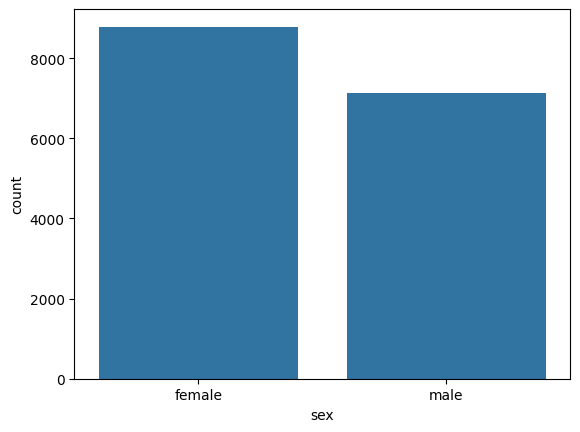

In [51]:
#빈도 막대 그래프
sns.countplot(data = welfare, x='sex')

In [52]:
welfare['income'].dtype #변수타입 출력

dtype('float64')

In [53]:
welfare['income'].describe() #요약 통계

count    5630.000000
mean      284.461989
std       222.592542
min         0.000000
25%       133.250000
50%       250.000000
75%       375.000000
max      2333.000000
Name: income, dtype: float64

<Axes: xlabel='income', ylabel='Count'>

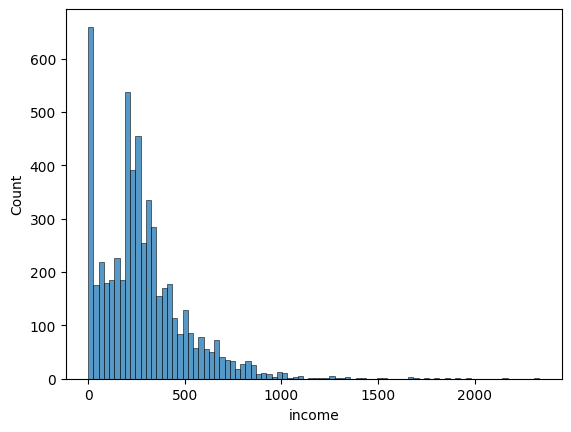

In [54]:
sns.histplot(data=welfare, x='income') #히스토그램

In [55]:
welfare['income'].describe() #이상치 확인

count    5630.000000
mean      284.461989
std       222.592542
min         0.000000
25%       133.250000
50%       250.000000
75%       375.000000
max      2333.000000
Name: income, dtype: float64

In [56]:
print(welfare['income'].isna().sum())  #결측치 확인

10301


In [58]:
#이상치 결측 처리
welfare['income'] =np.where(welfare['income'] == 9999, np.nan, welfare['income'])

#결측치 확인
welfare['income'].isna().sum()

np.int64(10301)

In [59]:
# 성별 월급 평균
sex_income = welfare.dropna(subset=['income'])\
                    .groupby('sex', as_index=False)\
                    .agg(mean_income =('income', 'mean'))
sex_income


,sex,mean_income
0,female,200.327693
1,male,373.581565


<Axes: xlabel='sex', ylabel='mean_income'>

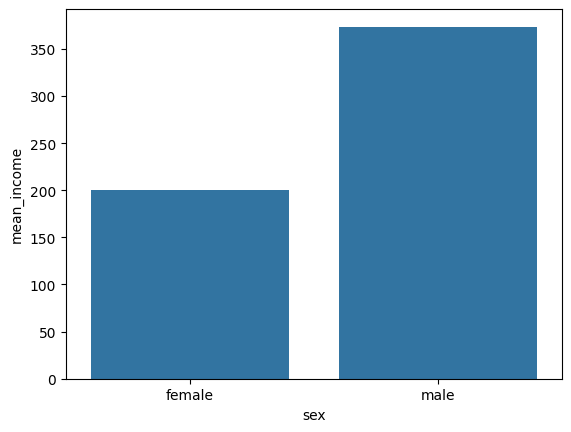

In [60]:
#막대 그래프
sns.barplot(data=sex_income, x='sex', y='mean_income')

In [62]:
#나이와 월급
welfare['birth'].dtypes

dtype('float64')

In [61]:

welfare['birth'].describe() #요약 통계

count    15931.000000
mean      1969.424016
std         24.226765
min       1906.000000
25%       1949.000000
50%       1965.000000
75%       1988.000000
max       2022.000000
Name: birth, dtype: float64

<Axes: xlabel='birth', ylabel='Count'>

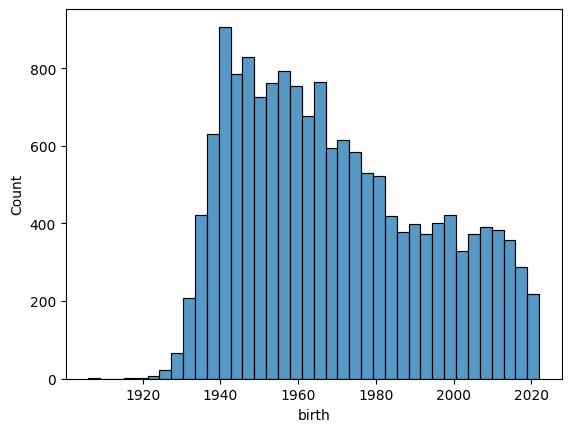

In [63]:
sns.histplot(data=welfare, x='birth')

In [64]:
# 전처리
welfare['birth'].describe() #이상치 확인

count    15931.000000
mean      1969.424016
std         24.226765
min       1906.000000
25%       1949.000000
50%       1965.000000
75%       1988.000000
max       2022.000000
Name: birth, dtype: float64

In [65]:
welfare['birth'].isna().sum() #결측치 확인

np.int64(0)

In [66]:
#이상치 결측 처리
welfare['birth']= np.where(welfare['birth'] == 9999, np.nan, welfare['birth'])

#결측치 확인
welfare['birth'].isna().sum()

np.int64(0)

In [67]:
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1 )
welfare['age'].describe()

count    15931.000000
mean        50.575984
std         24.226765
min         -2.000000
25%         32.000000
50%         55.000000
75%         71.000000
max        114.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

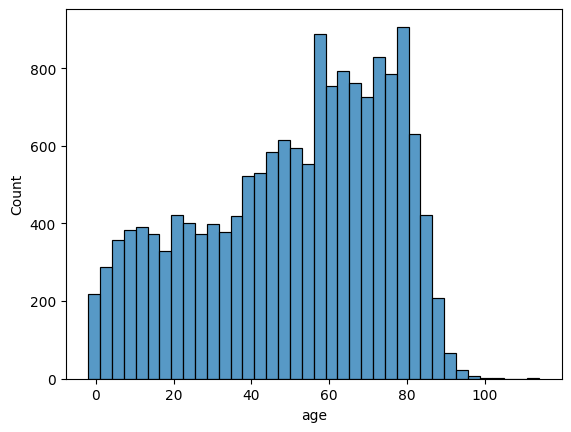

In [68]:
sns.histplot(data=welfare, x='age')

In [69]:
#나이별 월급 평균
age_income = welfare.dropna(subset= ['income'])\
                    .groupby('age')\
                    .agg(mean_income = ('income','mean'))
age_income.head()

,mean_income
age,
16.0,197.000000
17.0,186.500000
18.0,125.560000
19.0,138.800000
20.0,185.067797


<Axes: xlabel='age', ylabel='mean_income'>

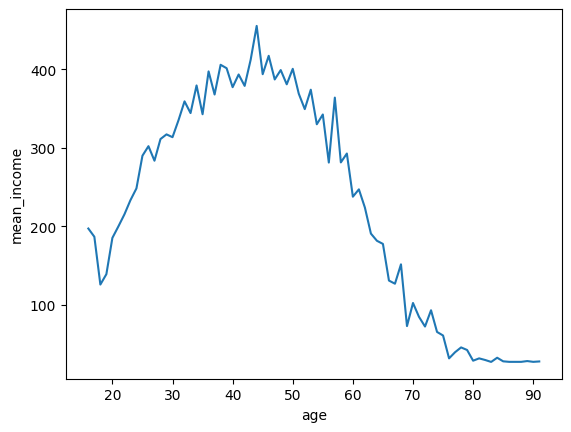

In [71]:
#선 그래프
sns.lineplot(data = age_income, x='age', y='mean_income')

In [72]:
#연령대에 따른 임금 차이
# 초년층: 30세 미만
# 중년층:30~59세
# 노년층: 60세 이상

#나이 변수 확인
welfare['age'].head()

0    75.0
1    72.0
2    78.0
3    58.0
4    57.0
Name: age, dtype: float64

In [73]:
welfare = welfare.assign(ageg =np.where(welfare['age']<30, 'young',
                                np.where(welfare['age']<=59, 'middle', 'old')))
welfare['ageg'].value_counts()

ageg
old       6914
middle    5339
young     3678
Name: count, dtype: int64

<Axes: xlabel='ageg', ylabel='count'>

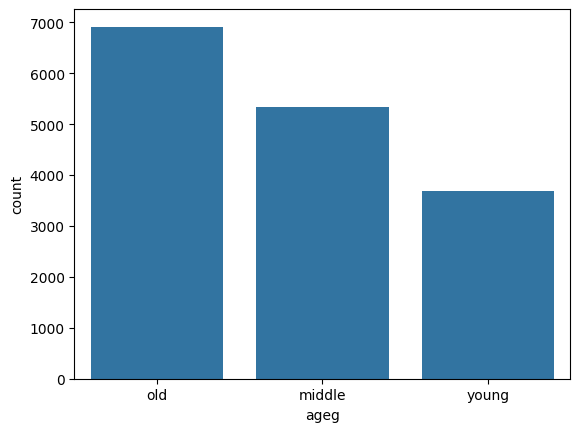

In [74]:
#빈도 그래프
sns.countplot(data = welfare, x= 'ageg')

In [75]:
#연령대별 월급 차이
# 연령대별 월급 평균
ageg_income = welfare.dropna(subset=['income'])\
                      .groupby('ageg', as_index=False)\
                      .agg(mean_income = ('income','mean'))
ageg_income

,ageg,mean_income
0,middle,370.207893
1,old,118.892308
2,young,253.487459


<Axes: xlabel='ageg', ylabel='mean_income'>

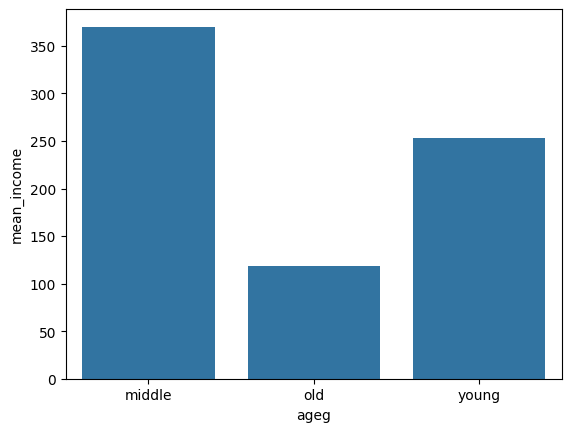

In [76]:
#시각화 - 막대 그래프
sns.barplot(data = ageg_income, x='ageg' , y= 'mean_income')

<Axes: xlabel='ageg', ylabel='mean_income'>

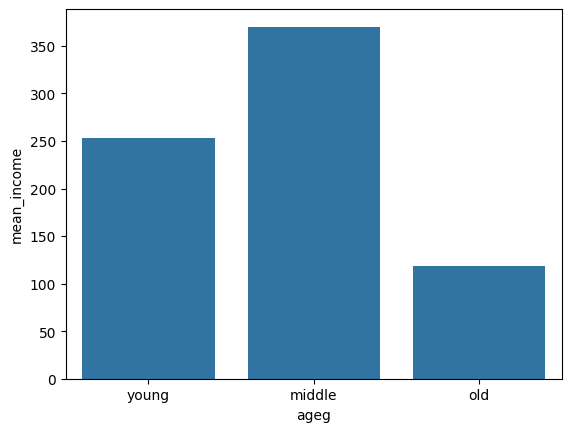

In [78]:
sns.barplot( data= ageg_income, x='ageg' , y='mean_income', order=['young','middle', 'old'])

### 연령대 및 성별 월급 차이

In [79]:
# 연령대 및 성별 평균
sex_income =welfare.dropna(subset=['income'])\
                    .groupby(['ageg','sex'], as_index=False)\
                    .agg(mean_income =('income','mean'))
sex_income

,ageg,sex,mean_income
0,middle,female,265.110274
1,middle,male,457.490330
2,old,female,80.148030
3,old,male,184.325540
4,young,female,237.080483
5,young,male,272.902381


<Axes: xlabel='ageg', ylabel='mean_income'>

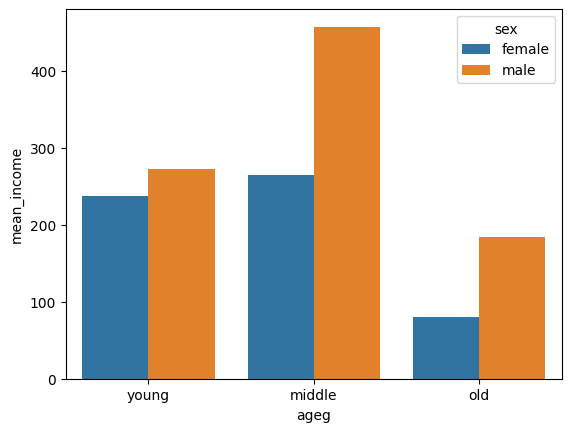

In [80]:
#연령대 및 성별 월급 시각화
sns.barplot(data= sex_income, x='ageg', y='mean_income', hue='sex', order=['young','middle','old'])

In [81]:
# 나이 별 성별 평균표
sex_age = welfare.dropna(subset=['income'])\
            .groupby(['ageg','sex'], as_index = False)\
            .agg(mean_income = ('income', 'mean'))
sex_age

,ageg,sex,mean_income
0,middle,female,265.110274
1,middle,male,457.490330
2,old,female,80.148030
3,old,male,184.325540
4,young,female,237.080483
5,young,male,272.902381


### 직업별 월급 차이

In [82]:
# 직업 코드
welfare['code_job'].dtype

dtype('float64')

In [83]:
welfare['code_job'].value_counts() #***

code_job
611.0    1195
941.0     670
521.0     384
312.0     310
999.0     273
         ... 
212.0       1
861.0       1
822.0       1
872.0       1
423.0       1
Name: count, Length: 153, dtype: int64

In [84]:
#잡코드의 직종
list_job = pd.read_excel('d:/data/(2023년 18차 한국복지패널조사) 조사설계서-가구용(beta1).xlsx',sheet_name='직종코드(2019 신분류)')
list_job.head()


,대분류,중분류,소분류,Unnamed: 3,직종코드는 소분류의 네자리를 넣음
0,1. 관리자,11. 공공 기관 및 기업 고위직,111,의회 의원∙고위 공무원 및 공공단체 임원,NaN
1,NaN,NaN,112,기업 고위 임원,NaN
2,NaN,12. 행정∙경영 지원 및 마케팅 관리직,121,행정 및 경영 지원 관리자,NaN
3,NaN,NaN,122,마케팅 및 광고∙홍보 관리자,NaN
4,NaN,13. 전문 서비스 관리직,131,연구∙교육 및 법률 관련 관리자,NaN


In [85]:
list_job.shape #직업군 종류

(156, 5)

In [93]:
#필요한 열만 추출
list_job= list_job[['소분류','Unnamed: 3']]
list_job.head()

,소분류,Unnamed: 3
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자


In [97]:
#열이름 변경
list_job.rename(columns={'소분류':'code_job', 'Unnamed: 3':'job'}, inplace=True)
list_job.head()

C:\Users\04-11\AppData\Local\Temp\ipykernel_11836\3398372745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_job.rename(columns={'소분류':'code_job', 'Unnamed: 3':'job'}, inplace=True)


,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자


In [98]:
#welfare에 list_job 결합하기
welfare=welfare.merge(list_job, how='left', on='code_job')

In [99]:
#code_job결측치 제거하고 code_job출력
welfare.dropna(subset=['code_job'])[['code_job','job']].head()

,code_job,job
1,942.0,건물 관리원 및 검표원
2,952.0,음식 관련 단순 종사자
3,855.0,금속기계 부품 조립원
8,941.0,청소원 및 환경미화원
9,151.0,판매 및 운송 관리자


In [100]:
#직업별 월급 평균
job_income = welfare.dropna(subset = ['job','income'])\
                    .groupby('job', as_index = False)\
                    .agg(mean_income=('income','mean'))
job_income.head()

,job,mean_income
0,가사 및 육아 도우미,90.926471
1,간호사,317.101449
2,감정∙기술영업및중개관련종사자,387.250000
3,건물 관리원 및 검표원,206.913043
4,건설 및 광업 단순 종사자,289.859649


In [103]:
#상위 10위 추출
top10=job_income.sort_values('mean_income', ascending=False)
top10

,job,mean_income
97,의료 진료 전문가,800.833333
101,인사 및 경영 전문가,760.333333
147,화학공학 기술자 및 시험원,729.200000
132,컴퓨터 하드웨어 및 통신공학 전문가,725.800000
128,철도운송 관련 종사자,698.000000
...,...,...
96,음식 관련 단순 종사자,115.238806
32,기타 돌봄∙보건 및 개인 생활 서비스 종사자,109.212121
0,가사 및 육아 도우미,90.926471
33,기타 서비스 관련 단순 종사자,77.402439


In [ ]:
#! pip install matplotlib

In [106]:
#맑은 고딕 폰트 설정
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family':"Malgun Gothic"})

<Axes: xlabel='mean_income', ylabel='job'>

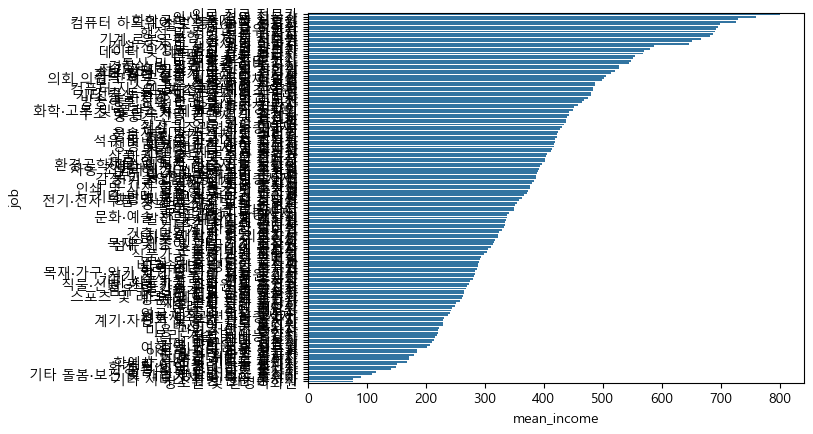

In [107]:
#위의 데이터 내용을 시각화
sns.barplot(data= top10, y='job', x='mean_income')

In [109]:
#하위 10위 추출
bottom10=job_income.sort_values('mean_income', ascending=True).head(10)
bottom10

,job,mean_income
129,청소원 및 환경미화원,76.252322
33,기타 서비스 관련 단순 종사자,77.402439
0,가사 및 육아 도우미,90.926471
32,기타 돌봄∙보건 및 개인 생활 서비스 종사자,109.212121
96,음식 관련 단순 종사자,115.238806
42,돌봄 및 보건 서비스 종사자,141.383929
148,환경∙청소 및 경비 관련 관리자,149.861111
38,농림∙어업 관련 단순 종사자,151.368421
140,학예사∙사서 및 기록물 관리사,168.000000
78,식음료 서비스 종사자,171.240000


[(0.0, 800.0)]

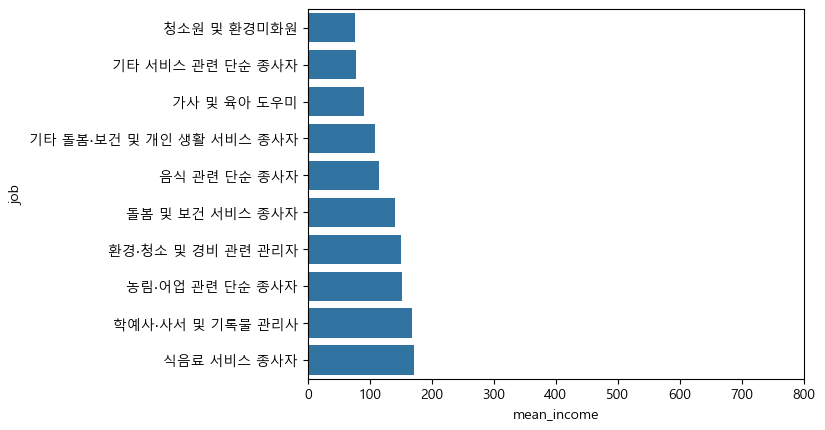

In [110]:
sns.barplot(data=bottom10, y='job', x='mean_income').set(xlim=(0,800))

In [ ]:
### 성별 직업 빈도

In [111]:
#남성 직업 빈도 상위 10개 추출
job_male=welfare.dropna(subset=['job'])\
                .query('sex=="male"')\
                .groupby('job',as_index=False)\
                .agg(n=('job','count'))\
                .sort_values('n', ascending=False)\
                .head(10)
job_male

,job,n
107,작물 재배 종사자,617
104,자동차 운전원,229
11,경영 관련 사무원,218
128,청소원 및 환경미화원,172
45,매장 판매 종사자,156
88,영업 종사자,107
33,기타 서비스 관련 단순 종사자,105
120,제조 관련 단순 종사자,102
4,건설 및 광업 단순 종사자,100
3,건물 관리원 및 검표원,95


In [112]:
#여성 직업 빈도 상위 10개 추출
job_female = welfare.dropna(subset=['job'])\
                    .query('sex=="female"')\
                    .groupby('job', as_index= False)\
                    .agg(n=('job','count'))\
                    .sort_values('n',ascending=False)\
                    .head(10)
job_female

,job,n
86,작물 재배 종사자,578
96,청소원 및 환경미화원,498
35,매장 판매 종사자,228
32,돌봄 및 보건 서비스 종사자,216
114,회계 및 경리 사무원,175
25,기타 서비스 관련 단순 종사자,168
61,식음료 서비스 종사자,152
76,음식 관련 단순 종사자,132
92,제조 관련 단순 종사자,123
93,조리사,120


[(0.0, 500.0)]

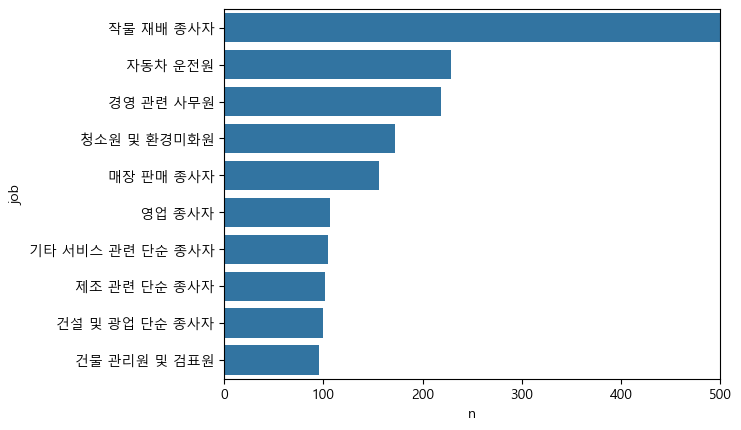

In [113]:
#남성 직업 빈도 막대 그래프
sns.barplot(data=job_male, y='job', x='n').set(xlim=(0,500))

[(0.0, 500.0)]

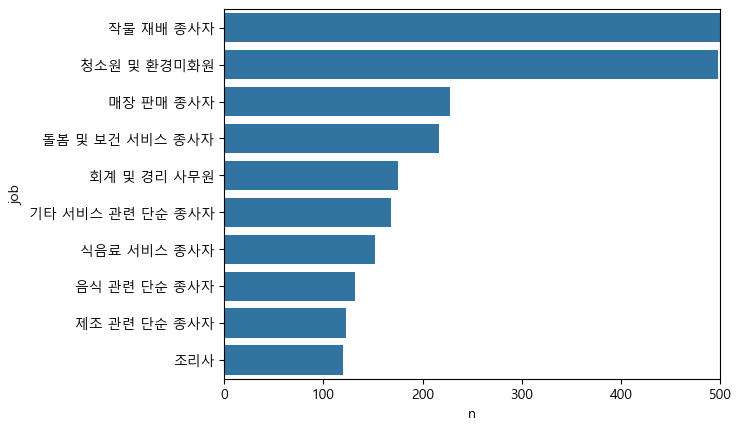

In [114]:
#여성 직업 빈도 막대그래프
sns.barplot(data=job_female, y='job', x='n').set(xlim=(0, 500))

In [ ]:
### 종교 유무에 따른 이혼율

In [115]:
welfare['religion'].dtypes

dtype('float64')

In [116]:
welfare['religion'].value_counts()

religion
2.0    8996
1.0    6935
Name: count, dtype: int64

In [117]:
#전처리:1-있슴, 2-없슴, 3- 모름/ 무응답
#종료 유무 이름 부여, 원래는 결측치 처리 해야함
welfare['religion']=np.where(welfare['religion']==1, 'yes','no')

#빈도구하기
welfare['religion'].value_counts()

religion
no     8996
yes    6935
Name: count, dtype: int64

<Axes: xlabel='religion', ylabel='count'>

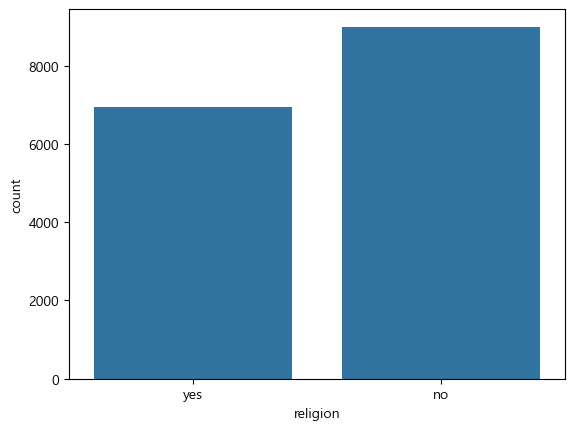

In [118]:
sns.countplot(data=welfare, x='religion')